<a href="https://colab.research.google.com/github/arpit0020/diabetes_predication/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import The necessary Library***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

### ***Upload The file***

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


### ***Load The Dataset***

In [ ]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

# ***Exploratory Data Analysis***

In [ ]:

# Display first five rows
print("First five rows of the dataset:")
print(df.head())

First five rows of the dataset:
   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [ ]:
# Dataset information
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB
None


In [ ]:
# statistical summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
              gender            age  hypertension  heart_disease  \
count  100000.000000  100000.000000  100000.00000  100000.000000   
mean        0.414660      41.885856       0.07485       0.039420   
std         0.493031      22.516840       0.26315       0.194593   
min         0.000000       0.080000       0.00000       0.000000   
25%         0.000000      24.000000       0.00000       0.000000   
50%         0.000000      43.000000       0.00000       0.000000   
75%         1.000000      60.000000       0.00000       0.000000   
max         2.000000      80.000000       1.00000       1.000000   

       smoking_history            bmi    HbA1c_level  blood_glucose_level  \
count    100000.000000  100000.000000  100000.000000        100000.000000   
mean          2.179650      27.320767       5.527507           138.058060   
std           1.889659       6.636783       1.070672            40.708136   
min           0.000000      10.010000       3.500000     

In [ ]:
# check unique value
df['gender'].unique()

array([0, 1, 2])

In [ ]:
# check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


# ***Data visualization***

In [ ]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

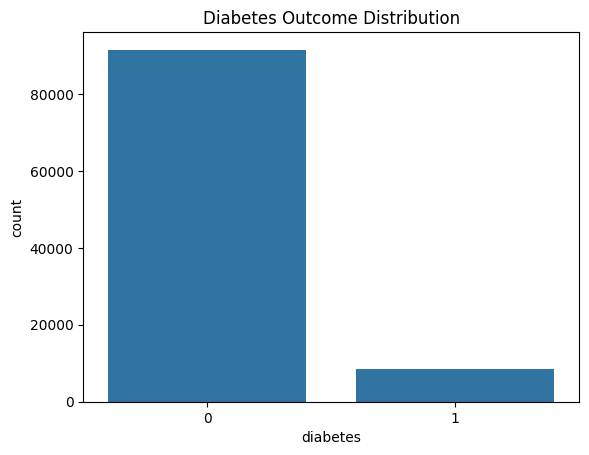

In [ ]:

# Visualize the distribution of the target variable
sns.countplot(x='diabetes', data=df)  # Assuming 'diabetes' is the target variable
plt.title('Diabetes Outcome Distribution')
plt.show()

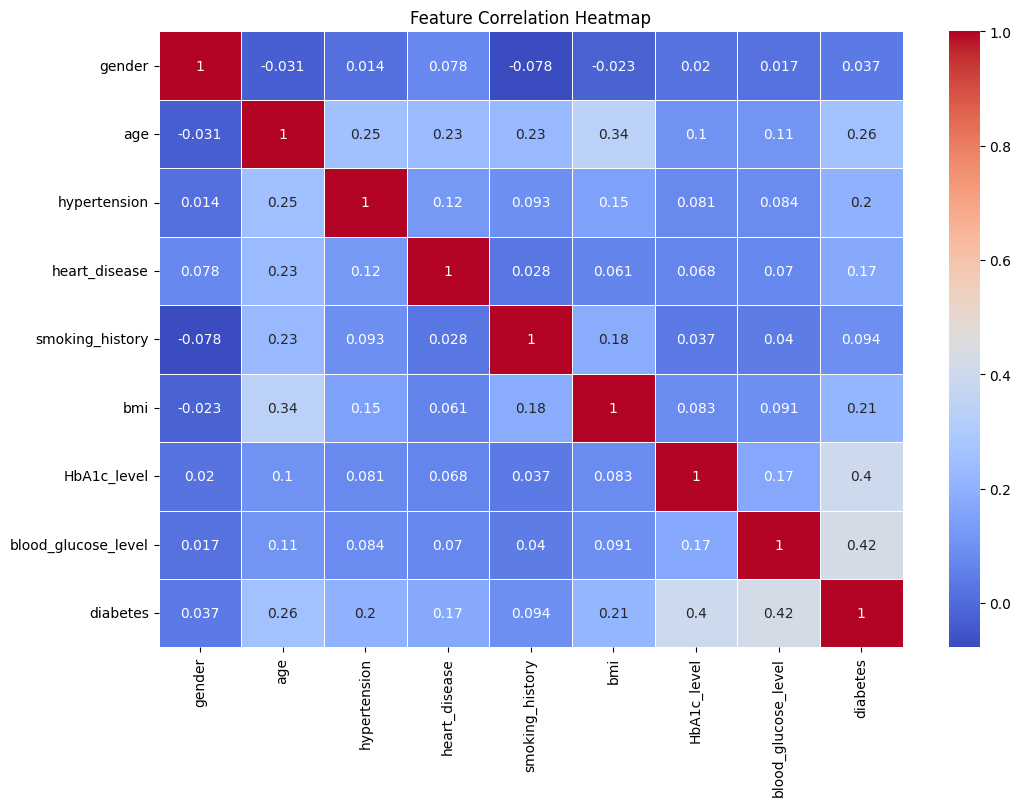

In [ ]:
# Visualizing correlation between features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

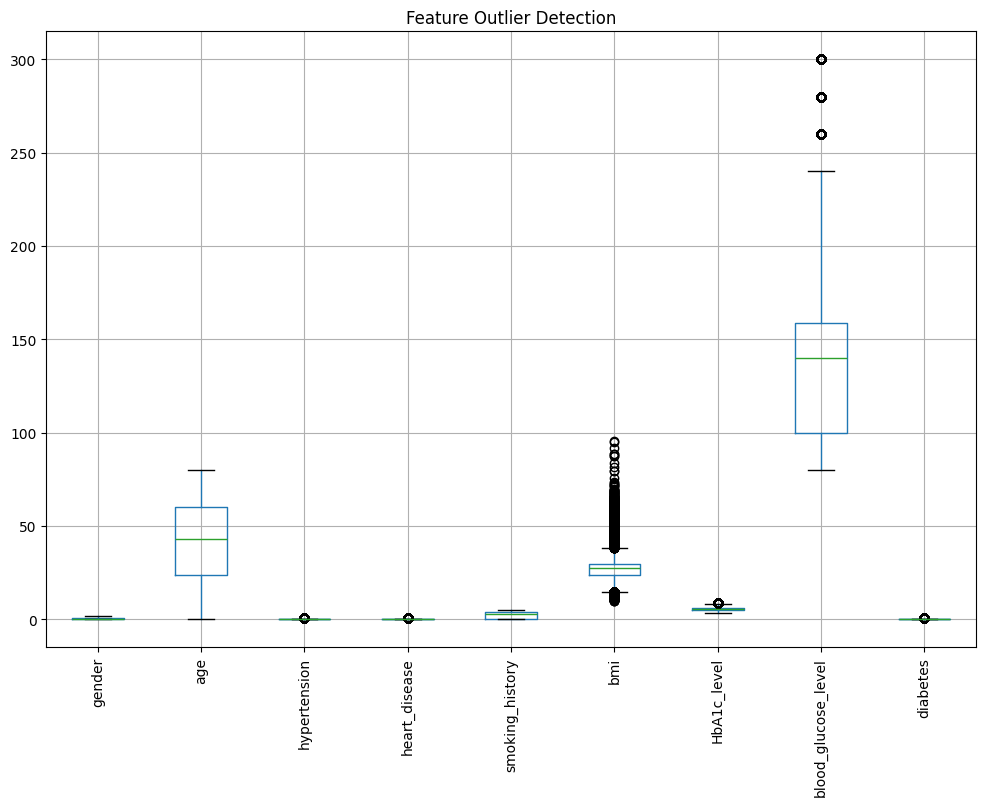

In [ ]:
# Boxplot for detecting outliers
plt.figure(figsize=(12,8))
df.boxplot(rot=90)
plt.title('Feature Outlier Detection')
plt.show()

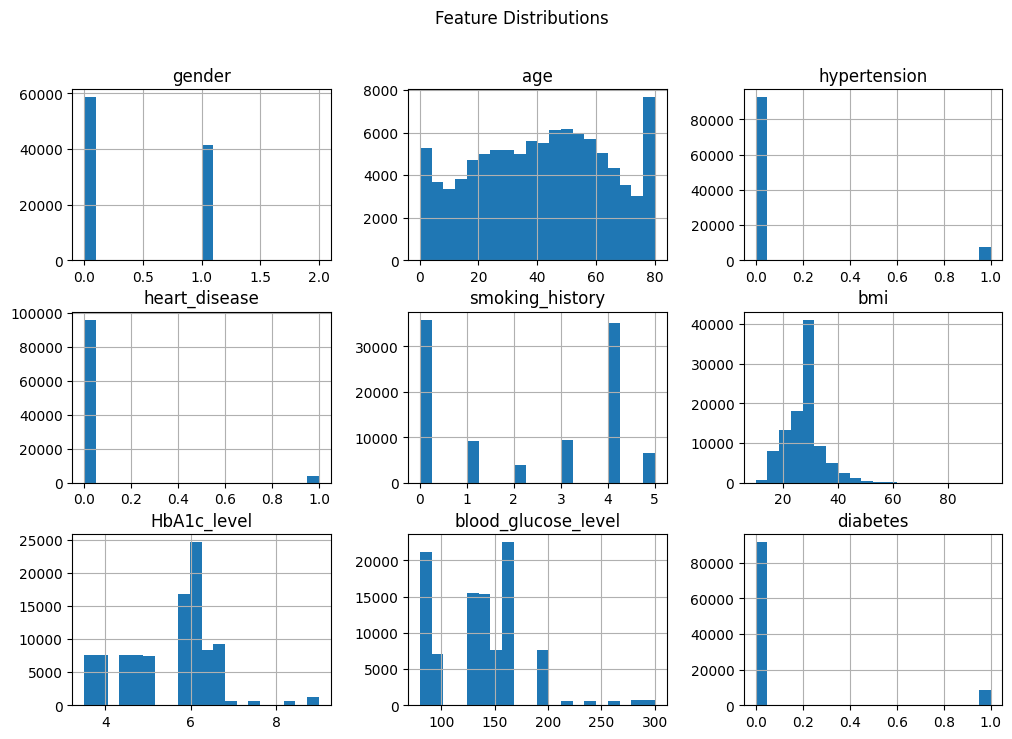

In [ ]:
# Histogram of numerical features
df.hist(figsize=(12,8), bins=20)
plt.suptitle('Feature Distributions')
plt.show()

In [ ]:
# Handling missing values
df.fillna(df.median(), inplace=True)

# **Data preprocessing**

In [ ]:
# Encoding categorical variables if present
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Handle missing values if any
df.fillna(df.median(), inplace=True)

In [ ]:
# Splitting data into features and target variable
X = df.drop(columns=['diabetes'])  # Replace 'diabetes' with the actual target column name
y = df['diabetes']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ***Model Training And Evolution***

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

best_model = None
best_accuracy = 0
final_model = None

In [ ]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\n' + '-'*50 + '\n')

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = name
        final_model = model

print(f'Best Model: {best_model} with Accuracy: {best_accuracy:.4f}')

Logistic Regression Accuracy: 0.9587
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Confusion Matrix:
[[18127   165]
 [  662  1046]]

--------------------------------------------------

Random Forest Accuracy: 0.9704
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix:
[[18231    61]
 [  531  1177]]

--------------------------------------------------

SVM Accuracy: 0.9624
Classif

## ***Save The Best Model***

In [ ]:
# Save the best model to a file
with open('best_diabetes_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)